# Track Machine Learning experiments and models

##### This notebook demonstrates an anomaly detection process on a sales dataset using Spark, Pandas, and Isolation Forest. The steps include:
###### 1. Initializing a Spark session and enabling Arrow optimization for efficient data transfer between Spark and Pandas.
###### 2. Loading the entire sales dataset from the lakehouse into a Spark DataFrame.
###### 3. Converting the Spark DataFrame to a Pandas DataFrame for further processing.
###### 4. Cleaning the 'Sales' column by removing non-numeric characters and converting 'Sales' and 'Profit' columns to numeric types.
###### 5. Dropping rows with NaN values in the 'Sales' and 'Profit' columns.
###### 6. Normalizing the 'Sales' and 'Profit' data using StandardScaler.
###### 7. Initializing and fitting an Isolation Forest model to detect anomalies in the normalized data.
###### 8. Predicting anomalies and classifying data points as normal or anomalous.
###### 9. Visualizing the anomalies using a scatter plot with improved readability and aesthetics.


Number of entries in the CSV file: (5901, 20)
Number of anomalies detected: 89


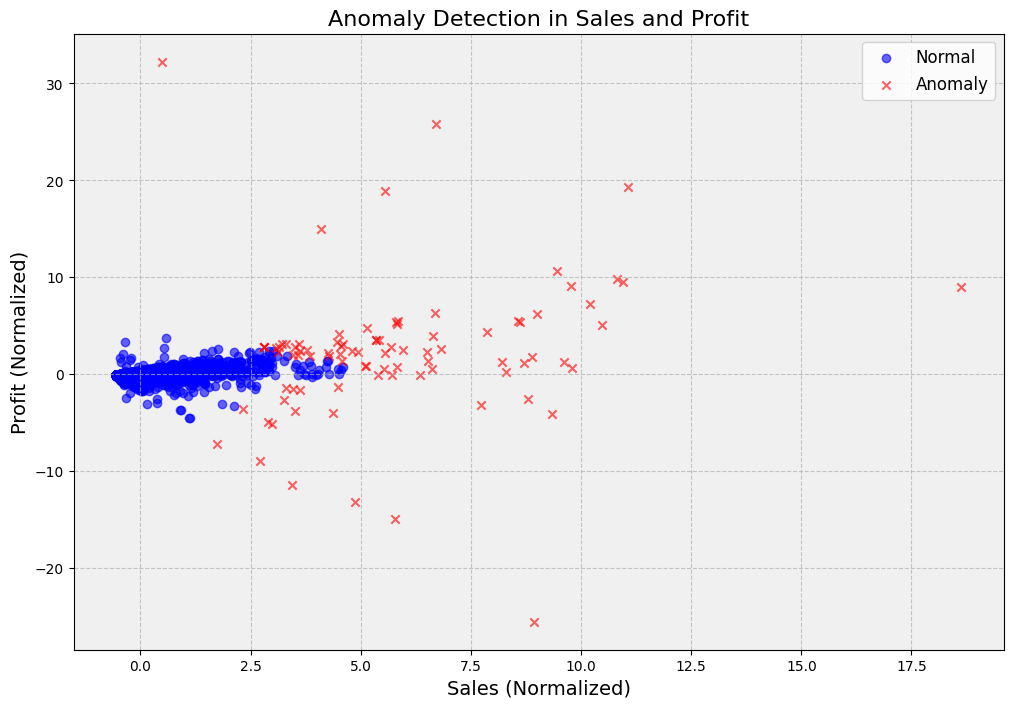

In [1]:
import pandas as pd
import re
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load data into pandas DataFrame from CSV file
pandas_df = pd.read_csv("SuperStore Sales DataSet.csv")

# Clean the 'Sales' column by removing non-numeric characters
pandas_df['Sales'] = pandas_df['Sales'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert 'Sales' and 'Profit' columns to numeric
pandas_df['Sales'] = pd.to_numeric(pandas_df['Sales'], errors='coerce')
pandas_df['Profit'] = pd.to_numeric(pandas_df['Profit'], errors='coerce')

# Drop rows with NaN values
pandas_df.dropna(subset=['Sales', 'Profit'], inplace=True)

# Normalize the data
scaler = StandardScaler()
pandas_df[['Sales', 'Profit']] = scaler.fit_transform(pandas_df[['Sales', 'Profit']])

# Initialize the Isolation Forest model
iso_forest = IsolationForest(contamination=0.015, random_state=42)

# Fit the model
iso_forest.fit(pandas_df[['Sales', 'Profit']].values)

entry_count = pandas_df.shape
print("Number of entries in the CSV file:", entry_count)

# Predict anomalies using the same feature names
pandas_df['anomaly'] = iso_forest.predict(pandas_df[['Sales', 'Profit']].values)

# Define normal and anomaly data points
normals = pandas_df[pandas_df['anomaly'] == 1]
anomalies = pandas_df[pandas_df['anomaly'] == -1]

print("Number of anomalies detected:", len(anomalies))

# Visualize the anomalies with improvements
plt.figure(figsize=(12, 8))
plt.scatter(normals['Sales'], normals['Profit'], c='blue', label='Normal', alpha=0.6, marker='o')
plt.scatter(anomalies['Sales'], anomalies['Profit'], c='red', label='Anomaly', alpha=0.6, marker='x')
plt.xlabel('Sales (Normalized)', fontsize=14)
plt.ylabel('Profit (Normalized)', fontsize=14)
plt.title('Anomaly Detection in Sales and Profit', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f0f0f0')
plt.show()